In [21]:
import sys
import math
import numpy as np
from numpy import pi, sqrt, inf, log
from ecell4 import *

L = 0.5
voxel_radius = 0.005
H = 3*voxel_radius*2
D = 1
rng = GSLRandomNumberGenerator()
rng.seed(1)
Pacc = 2#(1./r0-1)*ka_factor#ka / (6 * sqrt(2) * D * voxel_radius)
dt = ( voxel_radius * voxel_radius) / ( D)

maxstep= 5#10000
ntrials = int(1e7)
p=1

w = spatiocyte.SpatiocyteWorld(Real3(H,L,L),voxel_radius,rng)

coord1 = w.position2coordinate(Real3(0.5*H,0.5*L,0.5*L))
coord2 = w.get_neighbor(coord1, 0)
pos=w.coordinate2position(coord1)
dirn = [0,1,8,9,10,11]

def singlerunA(dt, Pacc,alpha):
    assert Pacc*alpha  <= 1
    assert alpha<=1

    coord1 = w.position2coordinate(Real3(0.5*H,0.5*L,0.5*L))
    coord2 = w.get_neighbor(coord1, 0)

    dt = dt*alpha
    t, nsteps = 0.0, 0
    while all(0 <= dim < L for dim in w.coordinate2position(coord2)) and nsteps < maxstep:
        rnd = w.rng().uniform_int(0, 5)
        newcoord = w.get_neighbor(coord2, dirn[rnd])
        if newcoord == coord1:
            if Pacc * alpha >= w.rng().uniform(0, 1):
                return nsteps+1
        elif alpha >= w.rng().uniform(0, 1):
            coord2 = newcoord
        t += dt
        nsteps += 1
    return False

def singlerunB(dt, Pacc):
    assert Pacc<= 1
    coord1 = w.position2coordinate(Real3(0.5*H,0.5*L,0.5*L))
    coord2 = w.get_neighbor(coord1, 0)

    dt = dt
    t, nsteps = 0.0, 0
    while all(0 <= dim < L for dim in w.coordinate2position(coord2)) and nsteps < maxstep:
        rnd = w.rng().uniform_int(0, 5)
        newcoord = w.get_neighbor(coord2, dirn[rnd])
        if newcoord == coord1:
            if Pacc >= w.rng().uniform(0, 1):
                return nsteps+1
        else:
            coord2 = newcoord
        t += dt
        nsteps += 1
    return False
        
if Pacc<=1:
    res = [singlerunB(dt, Pacc) for _ in range(ntrials)]
else:    
    res = [singlerunA(dt, Pacc,p/Pacc) for _ in range(ntrials)]


In [22]:
print('alpha',p/Pacc)
count = np.array([i for i in res if i !=False])
print('step',maxstep,'trials',ntrials,'Preb',len(count)/ntrials,1-len(count)/ntrials)

alpha 0.5
step 5 trials 10000000 Preb 0.4020483 0.5979517


In [23]:
for stp in range(maxstep):
    stp+=1
    count = np.array([i for i in res if i ==stp])
    print(len(count)/ntrials)

0.1667666
0.0970909
0.0625043
0.0434809
0.0322056


In [27]:
2/7

0.2857142857142857

In [20]:
from math import pi,sqrt
import matplotlib.pyplot as plt
from numpy import log,exp
import numpy as np
P=0.5
A=2*pi/sqrt(3)
def H(z):
    C=12*exp(A*(1./P-1))
    return A/P/(log(C/(1-z)))

def g(z):
    B=log(12/(1-z))/A-1
    return 1-1./(1+1./P/B)

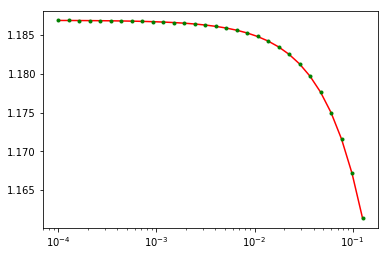

In [32]:
Z=np.logspace(-4,-0.9,30)
plt.plot(Z,H(Z),'r-')
plt.semilogx(Z,g(Z),'g.')

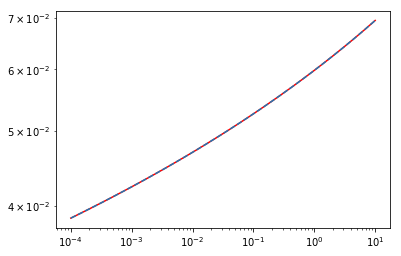

In [34]:
Z=np.logspace(-4,1,30)
C=12*exp(A*(1./P-1))
D=1
l=0.01
plt.semilogx(Z,1./log(C*(1+4*D/l/l/Z)),'r')
plt.loglog(Z,1./log(4*D*C/l/l/Z),'--')